In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [2]:
data=pd.read_csv('cutlets.csv')

In [3]:
data

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


# Assume Ho=There is no difference in diameter of cutlets between two units.H1=There is significant Difference in diameter of cutlets between two units.


In [4]:
UnitA=pd.Series(data.iloc[:,0])
UnitA


0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [5]:
UnitB=pd.Series(data.iloc[:,1])
UnitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [6]:
p_value=stats.ttest_ind(UnitA,UnitB)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [7]:
p_value[1]

0.4722394724599501

In [8]:
if p_value[1] < 0.05:
   print('There is significant Differeence in diameter of cutlets between two units.') #reject null hypothesis
else:
   print('There is no difference in diameter of cutlets between two units.') #failed to reject null hypothesis

There is no difference in diameter of cutlets between two units.


Conclusion is as p value is 0.4722 which is greater than α =0.05,we accept null hypothesis. therefore, mean1=mean2 which means there is no significant difference in diameters of the cutlets between the two units.

In [9]:
data=pd.read_csv('LabTAT.csv')

In [10]:
data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [11]:
data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


Null hypothesis(H0)=mean TAT for 4 laboratory is equal(mean1=mean2=mean3=mean4),There is no significance difference between TAT of laboratories. 

Alternate hypothesis(Ha)= If mean is not equal,there is significance difference between TAT of labratories.

In [12]:
#Anova test
p_value = stats.f_oneway(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],data.iloc[:,3])
print("The p-value is ",p_value[1])

The p-value is  2.1156708949992414e-57


In [13]:
#compare p value with α = 0.05
print(p_value[1]>0.05)

False


conclusion: p - value is less than 0.05. Reject null hypothesis. There is significance diffrence between TAT laboratories.

In [14]:
data=pd.read_csv('BuyerRatio.csv')
data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [15]:
obs=np.array([[50,142,131,70],[435,1523,1356,750]])
obs

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

Assume H0=All Proportions are equal. H1=Not all Proportions are equal.

In [16]:
chi2_contingency(obs)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [17]:
p_value=chi2_contingency(obs)[1]
p_value

0.6603094907091882

In [18]:
#Since p_value>0.05 we accept the null hypothesis i.e. All proportions are equal.

In [19]:
from scipy.stats import chi2_contingency

In [20]:
data=pd.read_csv('downloads/Costomer+OrderForm.csv')

In [21]:
data.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [22]:
data.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [23]:
data.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [24]:
data.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [25]:
data.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [26]:
ot=np.array([[271,267,269,280],[29,33,31,20]])
ot

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

Assume H0=Independance of categorical variable. H1=Dependance of categorical variable

In [27]:
chi2_contingency(ot)

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [28]:
p_value=0.277

In [29]:
if p_value < 0.05:
    print('dependance of categorical variable')
else:
    print('Independance of categorical variable')

Independance of categorical variable


# Simple Visualisations performed as follows-

In [30]:
import matplotlib.pyplot as plt

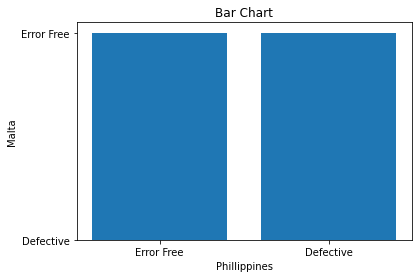

In [38]:
plt.bar(data['Phillippines'],data['Malta'])
plt.title("Bar Chart")
plt.xlabel('Phillippines')
plt.ylabel('Malta')
plt.show()

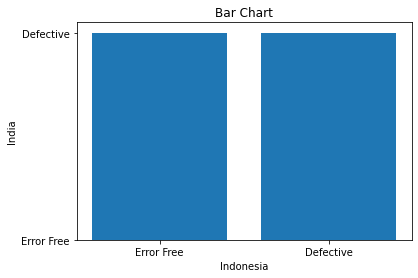

In [35]:
plt.bar(data['Indonesia'],data['India'])
plt.title("Bar Chart")
plt.xlabel('Indonesia')
plt.ylabel('India')
plt.show()

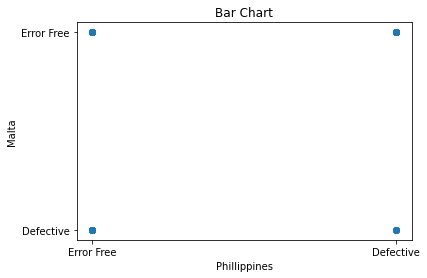

In [40]:
plt.scatter(data['Phillippines'],data['Malta'])
plt.title("Bar Chart")
plt.xlabel('Phillippines')
plt.ylabel('Malta')
plt.show()